In [1]:
# Adapted from : https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1


#import required libraries

import struct as st #This module performs conversions between Python values and C structs represented as Python bytes objects.
import numpy as np 
import matplotlib.pyplot as plt
import keras as kr
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Open the IDX file in readable binary mode.
filename = {'train_images' : 'train-images.idx3-ubyte' ,'train_labels' : 'train-labels.idx1-ubyte',
            'test_img':'t10k-images.idx3-ubyte','test_lbl':'t10k-labels.idx1-ubyte'}
train_imagesfile = open(filename['train_images'],'rb')
train_labelsfile = open(filename['train_labels'],'rb')
test_imagesfile = open(filename['test_img'],'rb')
test_labelsfile = open(filename['test_lbl'],'rb')


# Set pointer to the beginning of the file.
train_imagesfile.seek(0)
train_labelsfile.seek(0)
test_imagesfile.seek(0)
test_labelsfile.seek(0)

# Read the magic number
magic_img = st.unpack('>4B',train_imagesfile.read(4))
magic_lab = st.unpack('>4B',train_labelsfile.read(4))
magic_test_img = st.unpack('>4B',test_imagesfile.read(4))
magic_test_lab = st.unpack('>4B',test_labelsfile.read(4))


C:\Users\Slav\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

# Read the dimensions of the Image data-set
train_images = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
n_row_i = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
n_col_i = st.unpack('>I',train_imagesfile.read(4))[0] #num of column

test_images = st.unpack('>I',test_imagesfile.read(4))[0] #num of images
n_row_test = st.unpack('>I',test_imagesfile.read(4))[0] #num of rows
n_col_test = st.unpack('>I',test_imagesfile.read(4))[0] #num of column

# Read the dimensions of the Label data-set
train_labels = st.unpack('>I',train_labelsfile.read(4))[0] #num of items
test_labels = st.unpack('>I',test_labelsfile.read(4))[0] #num of items

# Reading the Image data
train_bytes_total = train_images*n_row_i*n_col_i*1 
test_bytes_total = test_images*n_row_test*n_col_test*1 

# 'B' is used since it is of 'unsigned char' C type and ‘integer’ Python type
# and has standard size 1 as mentioned in the official documentation of struct.
# ‘>’ is used since the data is in MSB first (high endian) format used by most 
# non-Intel processors, as mentioned in their original website.
train_img = 255 - np.asarray(st.unpack('>'+'B'*train_bytes_total,train_imagesfile.read(train_bytes_total))).reshape((train_images,n_row_i,n_col_i))
test_img =   255 - np.asarray(st.unpack('>'+'B'*test_bytes_total,test_imagesfile.read(test_bytes_total))).reshape((test_images,n_row_test,n_col_test))
 
# Reading the label data
train_lbl = np.asarray(st.unpack('>'+'B'*train_labels,train_labelsfile.read(train_labels))).reshape((train_labels))
test_lbl = np.asarray(st.unpack('>'+'B'*test_labels,test_labelsfile.read(test_labels))).reshape((test_labels))




In [3]:
# Reshape to the expected CNN format 
train_img = train_img.reshape(train_img.shape[0], train_img.shape[1], train_img.shape[2], 1).astype('float32')
test_img = test_img.reshape(test_img.shape[0], test_img.shape[1], test_img.shape[2], 1).astype('float32')



7


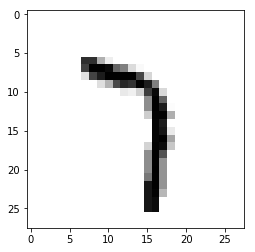

In [4]:
plt.imshow(test_img[122].reshape(28, 28), cmap='gray')
print(test_lbl[122])

In [5]:
# One hot encode images_array & test_img
train_img/=255
test_img/=255

# one hot encode
train_lbl = kr.utils.to_categorical(train_lbl, 10)
test_lbl = kr.utils.to_categorical(test_lbl, 10)


In [6]:
# Initialising the CNN
model = Sequential()
# Convolution layer
model.add(Conv2D(32,(3,3),input_shape = (train_img.shape[1],train_img.shape[2],1),activation = 'relu'))
# Pooling as reducing feature map
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())
# Full connection
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

# Compiling of the Model
model.compile( optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model

model.fit(train_img, train_lbl, validation_data=(test_img, test_lbl), epochs=10, batch_size=200)

# Evaluation of the model
metrics = model.evaluate(test_img, test_lbl, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 54s 897us/step - loss: 0.5022 - acc: 0.8695 - val_loss: 0.1710 - val_acc: 0.9507
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1515 - acc: 0.9564 - val_loss: 0.1112 - val_acc: 0.9683
Epoch 3/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1047 - acc: 0.9698 - val_loss: 0.0863 - val_acc: 0.9742
Epoch 4/10
60000/60000 [==============================] - 56s 936us/step - loss: 0.0801 - acc: 0.9772 - val_loss: 0.0783 - val_acc: 0.9763
Epoch 5/10
60000/60000 [==============================] - 56s 925us/step - loss: 0.0663 - acc: 0.9810 - val_loss: 0.0608 - val_acc: 0.9816
Epoch 6/10
60000/60000 [==============================] - 57s 942us/step - loss: 0.0557 - acc: 0.9838 - val_loss: 0.0551 - val_acc: 0.9818
Epoch 7/10
60000/60000 [==============================] - 53s 890us/step - loss: 0.0478 - acc: 0.9864 - val_loss: 0.0511

In [7]:
model.save('my_model.h5') 

from keras.models import load_model


In [8]:
model = load_model('my_model.h5')

[[9.99868393e-01 7.55221777e-07 2.84974794e-06 2.29080314e-07
  1.90830903e-07 1.60729849e-06 1.08177956e-04 4.63699479e-07
  4.84017028e-06 1.23795189e-05]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


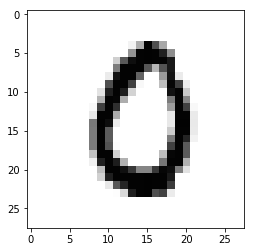

In [12]:
pred_model = model.predict(test_img[1005:1002])
 
print(pred_model)

print(test_lbl[1001])
                
plt.imshow(test_img[1001].reshape(28, 28), cmap='gray')